In [2]:
import json
import urllib3
import time
import urllib.request
import pandas as pd
from pandas.io.json import json_normalize
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['savefig.bbox'] = 'tight'
plt.rcParams['savefig.pad_inches'] = 0
plt.rcParams['savefig.format'] = 'pdf'
plt.rcParams['legend.frameon'] = True

#pd.set_option('display.max_rows', 50)
#pd.set_option('display.max_columns', 50)

import seaborn as sns
sns.set_context('notebook')
sns.set_style('whitegrid')
sns.set_palette('deep')


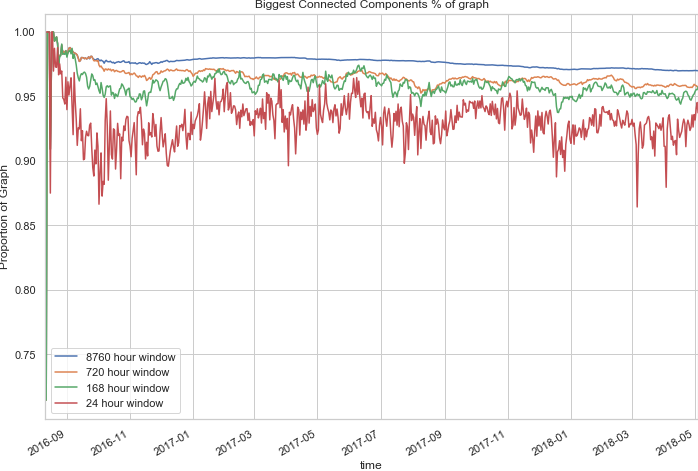

In [6]:
windows = [31536000000,2592000000,604800000,86400000]
with open('bigCC.json') as json_file:
    x = json.load(json_file)
    x= pd.DataFrame(x['views'])
    x['time'] = pd.to_datetime(x['time'],unit='ms')
    x = x[x['total'] != 0]
    a4_dims = (11.7, 8.27)
    fig, ax = plt.subplots(figsize=a4_dims)
    plt.title('Biggest Connected Components % of graph')
    plt.xlabel('Date')
    plt.ylabel('Proportion of Graph')
    for i in windows:
        y = x[x['windowsize'] == i]
        hours = str(int((i/3600000)))+" hour window"
        y.plot(x='time', y='proportion',ax=ax, label=hours)
    plt.show()

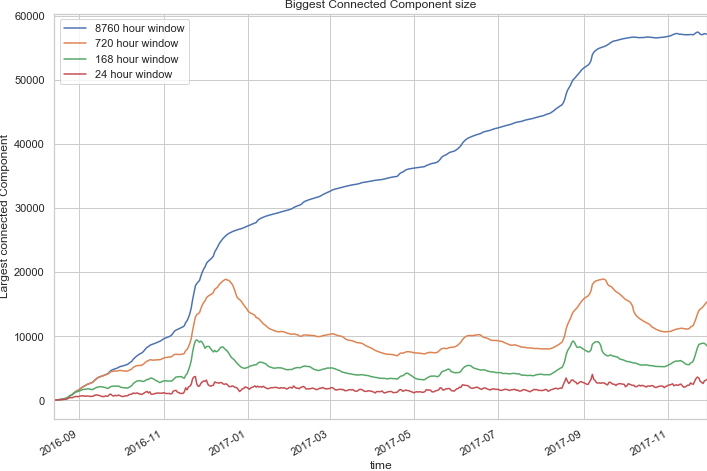

In [6]:
with open('bigCC.json') as json_file:
    x = json.load(json_file)
    x= pd.DataFrame(x['views'])
    x['time'] = pd.to_datetime(x['time'],unit='ms')
    x = x[x['total'] != 0]
    a4_dims = (11.7, 8.27)
    fig, ax = plt.subplots(figsize=a4_dims)
    plt.title('Biggest Connected Component size')
    plt.xlabel('Date')
    plt.ylabel('Largest connected Component')
    for i in windows:
        y = x[x['windowsize'] == i]
        hours = str(int((i/3600000)))+" hour window"
        y.plot(x='time', y='biggest',ax=ax, label=hours)
    plt.show()

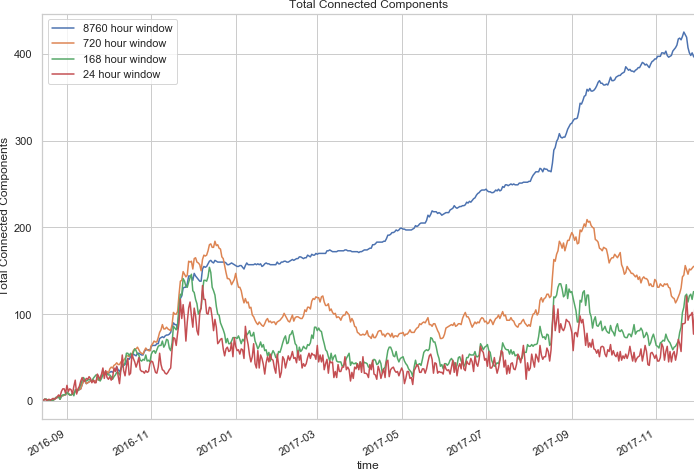

In [7]:
windows = [31536000000,2592000000,604800000,86400000]
with open('bigCC.json') as json_file:
    x = json.load(json_file)
    x= pd.DataFrame(x['views'])
    x['time'] = pd.to_datetime(x['time'],unit='ms')
    x = x[x['total'] != 0]
    a4_dims = (11.7, 8.27)
    fig, ax = plt.subplots(figsize=a4_dims)
    plt.title('Total Connected Components')
    plt.xlabel('Date')
    plt.ylabel('Total Connected Components')
    for i in windows:
        y = x[x['windowsize'] == i]
        hours = str(int((i/3600000)))+" hour window"
        y.plot(x='time', y='totalWithoutIslands',ax=ax, label=hours)
    plt.show()

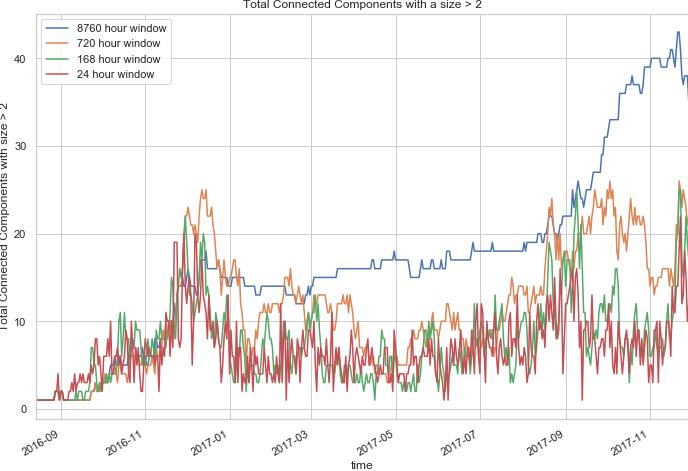

In [8]:
windows = [31536000000,2592000000,604800000,86400000]
with open('bigCC.json') as json_file:
    x = json.load(json_file)
    x= pd.DataFrame(x['views'])
    x['time'] = pd.to_datetime(x['time'],unit='ms')
    x = x[x['total'] != 0]
    a4_dims = (11.7, 8.27)
    fig, ax = plt.subplots(figsize=a4_dims)
    plt.title('Total Connected Components with a size > 2')
    plt.xlabel('Date')
    plt.ylabel('Total Connected Components with size > 2')
    for i in windows:
        y = x[x['windowsize'] == i]
        hours = str(int((i/3600000)))+" hour window"
        y.plot(x='time', y='clustersGT2',ax=ax, label=hours)
    plt.show()

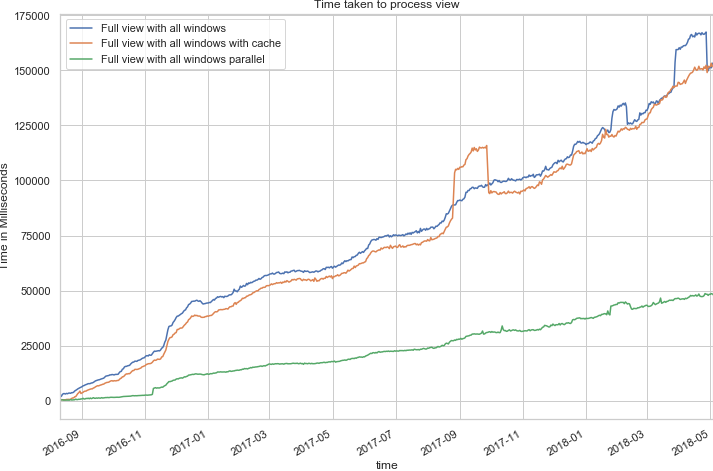

In [4]:
windows = [31536000000,2592000000,604800000,86400000]

cc1=0
cc2=0
cc3=0

with open('bigCC.json') as json_file:
    cc1 = json.load(json_file)
    cc1= pd.DataFrame(cc1['views'])
    cc1['time'] = pd.to_datetime(cc1['time'],unit='ms')
    cc1 = cc1[cc1['total'] != 0]

with open('bigCC2.json') as json_file:
    cc2 = json.load(json_file)
    cc2= pd.DataFrame(cc2['views'])
    cc2['time'] = pd.to_datetime(cc2['time'],unit='ms')
    cc2 = cc2[cc2['total'] != 0]
    
with open('bigCC3.json') as json_file:
    cc3 = json.load(json_file)
    cc3= pd.DataFrame(cc3['views'])
    cc3['time'] = pd.to_datetime(cc3['time'],unit='ms')
    cc3 = cc3[cc3['total'] != 0]
    
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
plt.title('Time taken to process view')
plt.xlabel('Date')
plt.ylabel('Time in Milliseconds')
cc1.plot(x='time', y='viewTime',ax=ax, label="Full view with all windows")
cc2.plot(x='time', y='viewTime',ax=ax, label="Full view with all windows with cache")
cc3.plot(x='time', y='viewTime',ax=ax, label="Full view with all windows parallel")

plt.show()

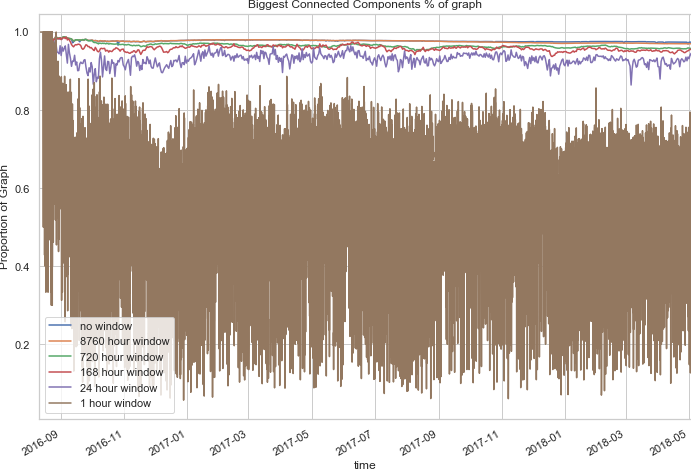

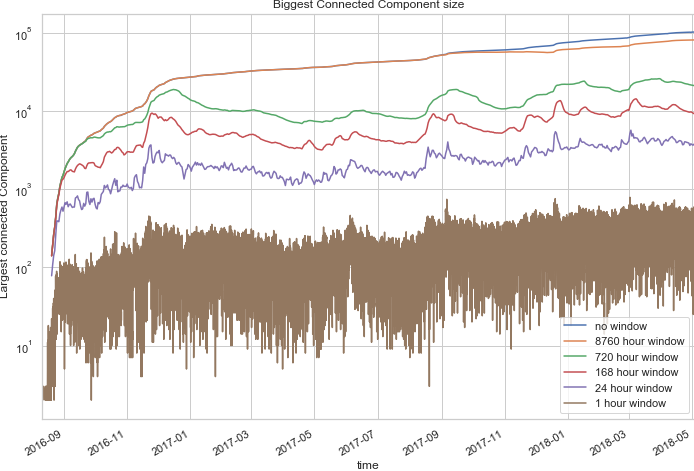

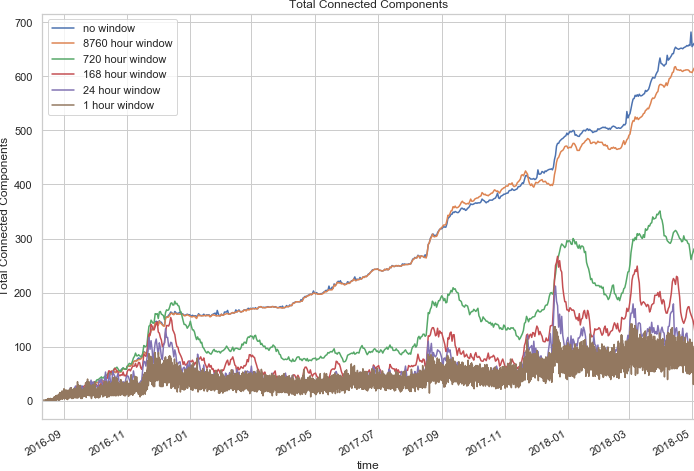

In [32]:
def fullPlot(toPlot,title,x,y,scale):
    windows = [31536000000,2592000000,604800000,86400000]
    a4_dims = (11.7, 8.27)
    fig, ax = plt.subplots(figsize=a4_dims)
    plt.title(title)
    plt.xlabel(x)
    plt.ylabel(y)
    ax.set_yscale(scale)

    with open('nowindow.json') as json_file:
        x = json.load(json_file)
        x= pd.DataFrame(x['views'])
        x['time'] = pd.to_datetime(x['time'],unit='ms')
        x = x[x['total'] != 0]
        x.plot(x='time', y=toPlot,ax=ax, label="no window")

    with open('bigCC.json') as json_file:
        cc1 = json.load(json_file)
        cc1= pd.DataFrame(cc1['views'])
        cc1['time'] = pd.to_datetime(cc1['time'],unit='ms')
        cc1 = cc1[cc1['total'] != 0]
        for i in windows:
            y = cc1[cc1['windowsize'] == i]
            hours = str(int((i/3600000)))+" hour window"
            y.plot(x='time', y=toPlot,ax=ax, label=hours)

    with open('cchour.json') as json_file:
        x = json.load(json_file)
        x= pd.DataFrame(x['views'])
        x['time'] = pd.to_datetime(x['time'],unit='ms')
        x = x[x['total'] != 0]
        x.plot(x='time', y=toPlot,ax=ax, label="1 hour window")
    plt.show()


windows = [31536000000,2592000000,604800000,86400000]

fullPlot('proportion','Biggest Connected Components % of graph','Date','Proportion of Graph','linear')

fullPlot('biggest','Biggest Connected Component size','Date','Largest connected Component','log')

fullPlot('totalWithoutIslands','Total Connected Components','Date','Total Connected Components','linear')

